In [1]:
import tensorflow as tf

2023-03-23 17:27:17.064310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [7]:
path = 'Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

In [15]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])) # get the class names
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [12]:
# define paths to images and get the image count

benign_path = os.path.join(data_dir, 'benign')
malignant_path = os.path.join(data_dir, 'malignant')
normal_path = os.path.join(data_dir, 'normal')

In [13]:
# get the number of images in each folder
benign_count = len(os.listdir(benign_path))
malignant_count = len(os.listdir(malignant_path))
normal_count = len(os.listdir(normal_path))

print('benign images: ', benign_count, 'malignant images: ', malignant_count, 'normal images: ', normal_count)

benign images:  891 malignant images:  421 normal images:  266


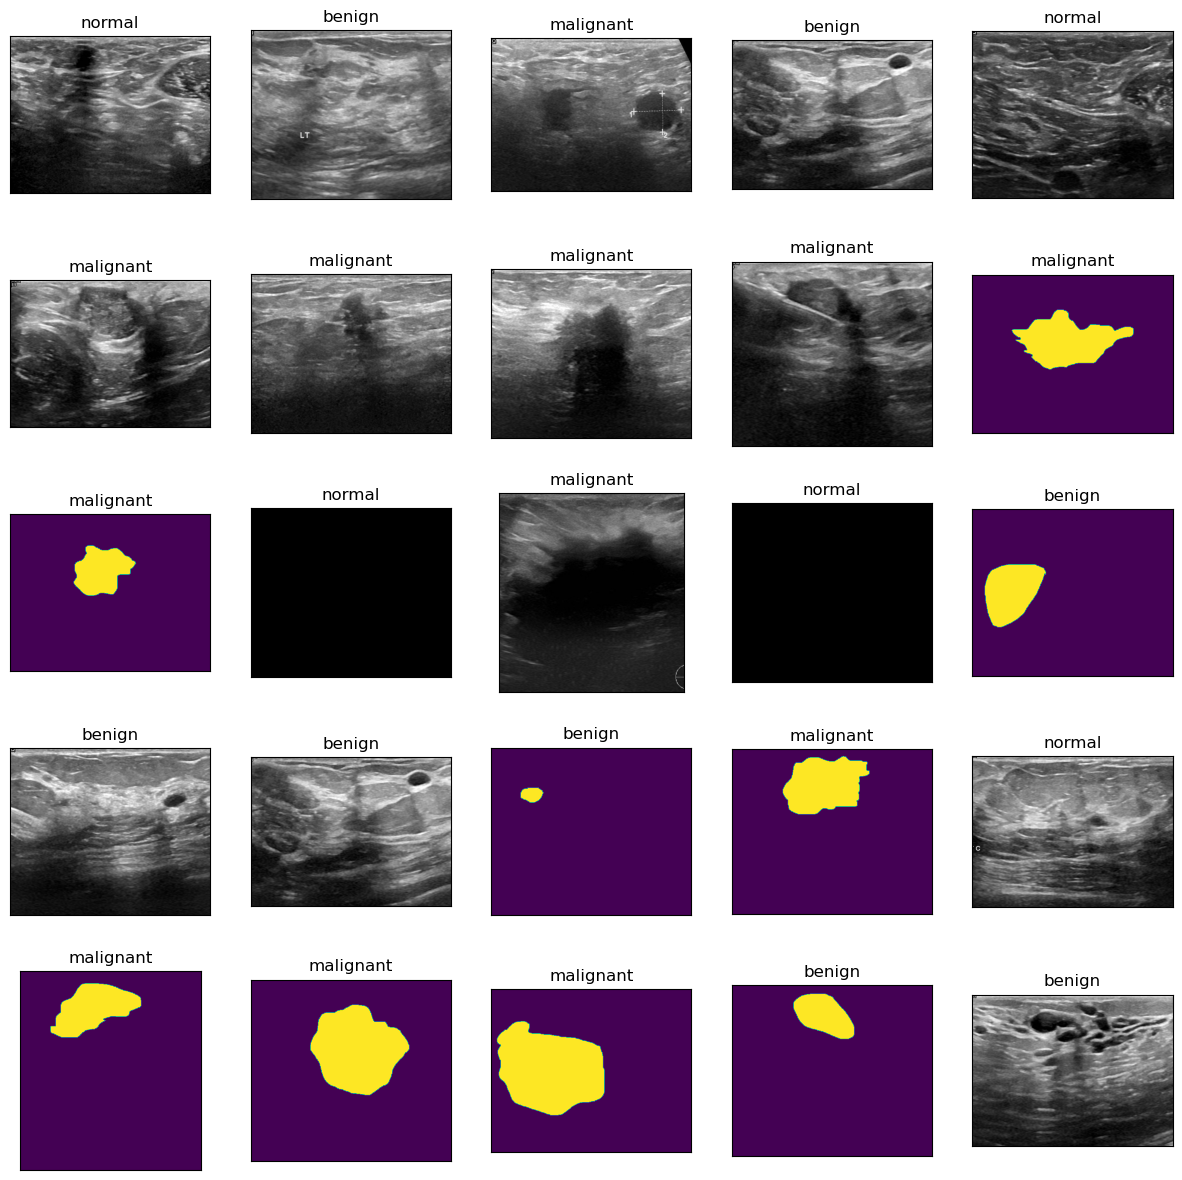

In [19]:
# make plotting of random images bfrom each class

plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names.tolist())  # Convert NumPy array to a list
    img = plt.imread(random.choice(list(data_dir.glob(random_class + '/*.png'))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [20]:
from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/var/folders/8m/pkfwlqk10l18rzskdsvz26sr0000gn/T/ipykernel_95382/1356360194.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [1]:
# build the CNN model

batch_size = 32
img_height = 224
img_width = 224

In [2]:
# test